Prompt ablations for different ways of prompting LLMs to fill entire survey questionnaires

In [1]:
dir_discriminator = '../results/discriminator_test/'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from plot_utils.plot_utils import plot_discriminator

In [3]:
from plot_utils.models import hf_models, model_names, model_sizes

discriminator_models = list(set(hf_models) - set(['mpt', 'mpt-chat', 'mpt-instruct']))
discriminator_models = sorted(discriminator_models, key=lambda x: model_sizes[x])

# get the discriminator test metrics for discriminating U.S. states
s_acs = pd.read_csv(f'{dir_discriminator}/states_accuracies.csv')
s_acs = s_acs.groupby(['s'])['xgboost'].mean()
mean_s = s_acs.mean() * 100
lower_s = mean_s - 2 * s_acs.std() * 100
upper_s = mean_s + 2 * s_acs.std() * 100

### "Question", "Answer" template resembling few-shot question answering tasks

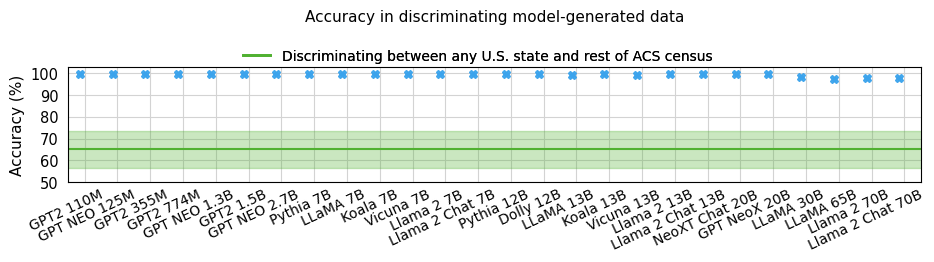

In [4]:
prompt = 'qa'
accuracies = {m: pd.read_csv(f'{dir_discriminator}{prompt}/{m}_accuracies.csv')['xgboost'] 
              for m in discriminator_models}

plot_discriminator(accuracies, None, discriminator_models, model_names, 
                   figsize=(11., 1.5), legendx=0.75,
                   mean_s=mean_s, lower_s=lower_s, upper_s=upper_s)

plt.ylim([50, 103])
plt.show()

### "Interviewer", "Me" template used by Argyle et al

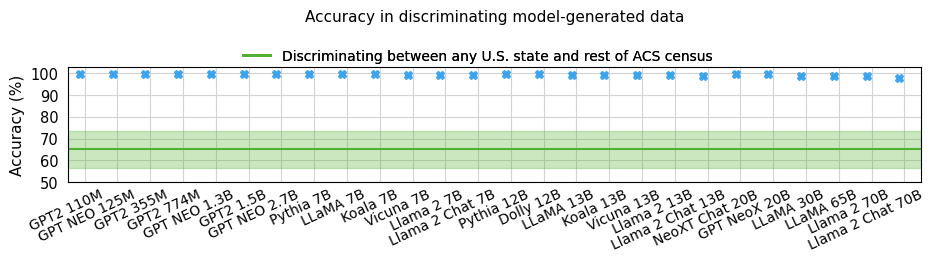

In [5]:
prompt = 'interview'
accuracies = {m: pd.read_csv(f'{dir_discriminator}{prompt}/{m}_accuracies.csv')['xgboost'] 
              for m in discriminator_models}

plot_discriminator(accuracies, None, discriminator_models, model_names, 
                   figsize=(11., 1.5), legendx=0.75,
                   mean_s=mean_s, lower_s=lower_s, upper_s=upper_s)

plt.ylim([50, 103])
plt.show()